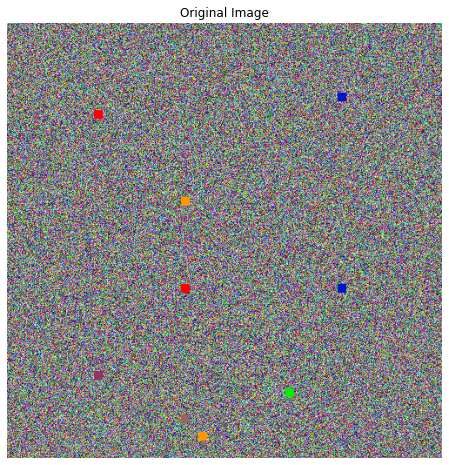

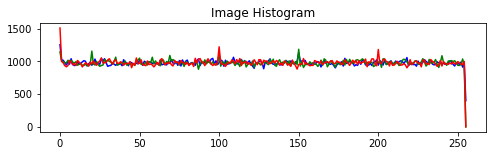

In [134]:
# Rysujemy histogramy dla RGB

import cv2 
import matplotlib.pyplot as plt 
import numpy as np
import math
# load image 
imageObj = cv2.imread('random_dots.png') 
#When we read the image using cv2.imread() method, the image read is in BGR format
imageObj = cv2.cvtColor(imageObj, cv2.COLOR_BGR2RGB)
# to avoid grid lines 
plt.figure(num=None, figsize=(8, 8))
plt.axis("off") 
plt.title("Original Image") 
plt.imshow(imageObj) #zapisany obraz jest bgr trzeba go zamienić na rgb
plt.show() 

# Get BGR data from image 
blue_color = cv2.calcHist([imageObj], [0], None, [256], [0, 256]) 
green_color = cv2.calcHist([imageObj], [1], None, [256], [0, 256]) 
red_color = cv2.calcHist([imageObj], [2], None, [256], [0, 256]) 


plt.figure(num=None, figsize=(8, 2))
plt.plot(blue_color, color='b') 
plt.plot(green_color, color='g') 
plt.plot(red_color, color='r') 
plt.title('Image Histogram') 
plt.show()

In [2]:
rgb_list = ['Reds','Greens','Blues']

def show_rgb(image):
    fig, ax = plt.subplots(1, 3, figsize=(15,5), sharey = True)
    for i in range(3):
        ax[i].imshow(image[:,:,i], cmap = rgb_list[i])
        ax[i].set_title(rgb_list[i], fontsize = 15)

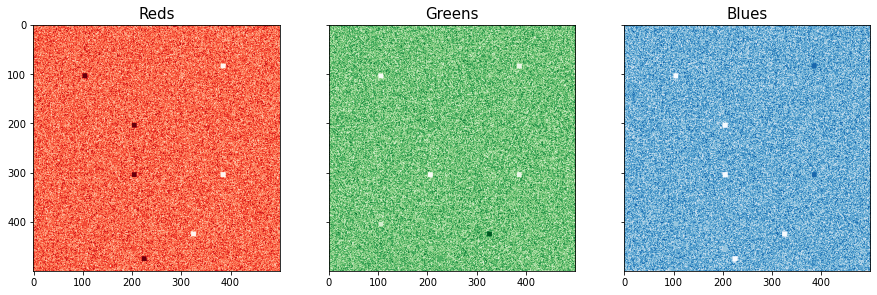

In [3]:
show_rgb(imageObj)


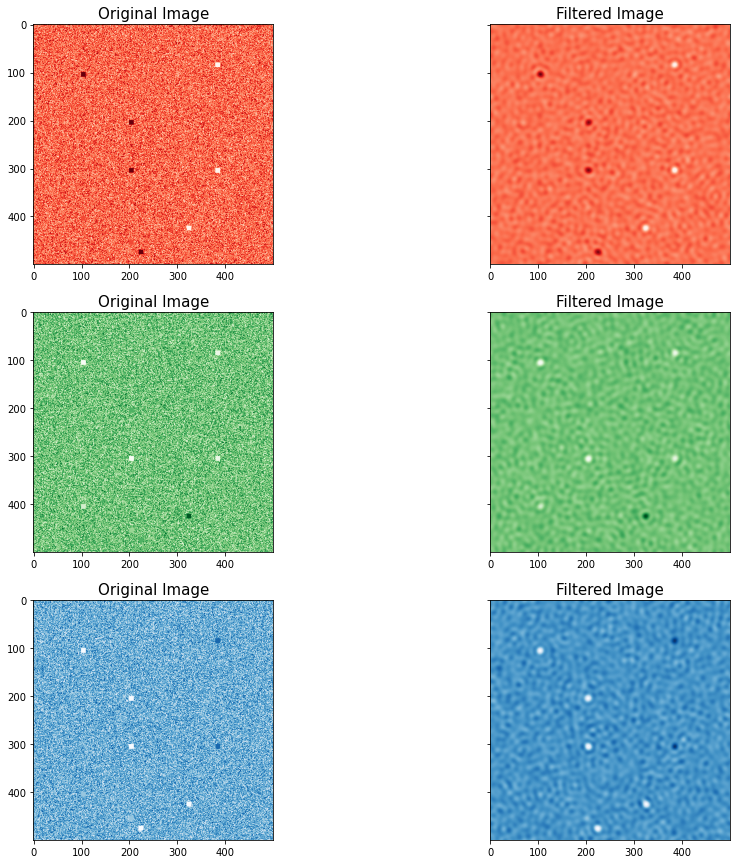

In [67]:
fig, ax = plt.subplots(3, 2, figsize=(15,15), sharey = True)
rows, cols = imageObj[:,:,0].shape
filtered = np.ones((500, 500, 3), dtype='uint8')
for i in range(3):
    # Fourier transform
    f_transform = np.fft.fft2(imageObj[:, :, i])
    f_transform_shifted = np.fft.fftshift(f_transform)

    # Dimensions of the image
    crow, ccol = rows // 2, cols // 2

    # Create a low-pass filter mask
    mask = np.zeros((rows, cols), np.uint8)
    r = 35
    center = [crow, ccol]
    x, y = np.ogrid[:rows, :cols]
    mask_area = (x - center[0])**2 + (y - center[1])**2 <= r**2
    mask[mask_area] = 1
    
    print(mask.shape, "mask")
    print(f_transform_shifted.shape, "fft")
    # Apply mask to the shifted FFT
    f_transform_shifted_filtered = f_transform_shifted * mask

    # Inverse Fourier transform
    f_transform_filtered = np.fft.ifftshift(f_transform_shifted_filtered)
    image_filtered = np.fft.ifft2(f_transform_filtered).real  # Take the real part
    image_filtered = np.abs(image_filtered)
    
    # Normalize to [0, 255]
    image_filtered = (image_filtered - np.min(image_filtered)) / (np.max(image_filtered) - np.min(image_filtered)) * 255
    filtered[:, :, i] = image_filtered.astype('uint8')

    # Display the original and filtered images
    ax[i][0].imshow(imageObj[:, :, i], cmap=rgb_list[i])
    ax[i][0].set_title('Original Image', fontsize=15)

    ax[i][1].imshow(filtered[:, :, i], cmap=rgb_list[i])
    ax[i][1].set_title('Filtered Image', fontsize=15)

plt.show()



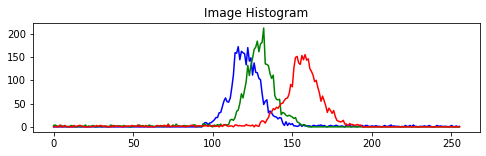

In [5]:
#image_part = imageObj[75:125,75:150,:]
image_part = filtered[75:125, 75:150, :]
#image_part = imageObj[:, :, :]

# Calculate histograms
blue_color = cv2.calcHist([image_part], [0], None, [256], [0, 256])
green_color = cv2.calcHist([image_part], [1], None, [256], [0, 256])
red_color = cv2.calcHist([image_part], [2], None, [256], [0, 256])




plt.figure(num=None, figsize=(8, 2))
plt.plot(blue_color, color='b') 
plt.plot(green_color, color='g') 
plt.plot(red_color, color='r') 
plt.title('Image Histogram') 
plt.show()

(50, 75)


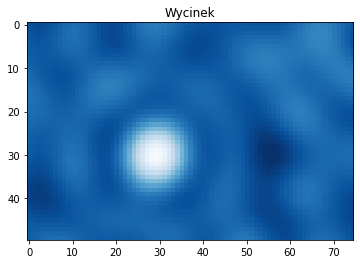

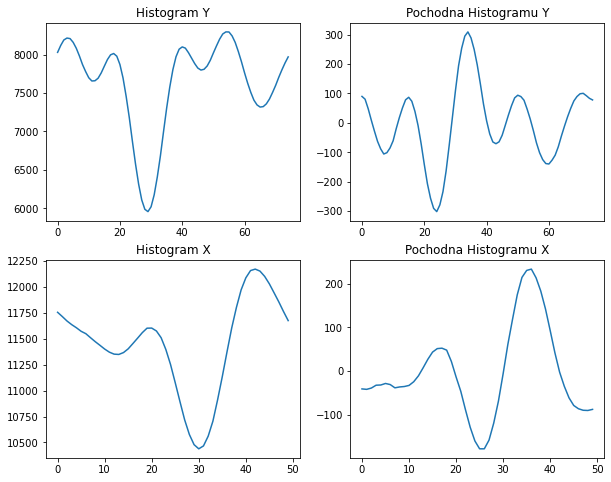

In [6]:
# Obliczenie histogramu w kierunku x

cols, rows = image_part[:,:,0].shape

print(image_part[:,:,0].shape)
hist_x = np.zeros(cols)
hist_y = np.zeros(rows)

for row in range(rows):
    for col in range(cols):
        hist_x[col] += image_part[col][row][2]
        hist_y[row] += image_part[col][row][2]

pochodna_y = np.gradient(hist_y,range(rows))
pochodna_x = np.gradient(hist_x,range(cols))


plt.imshow(image_part[:,:,2],'Blues')
plt.title('Wycinek') 
plt.show()

fig, ax = plt.subplots(2, 2, figsize=(10, 8))

ax[0,0].plot(hist_y)
ax[0,0].set_title('Histogram Y') 


ax[0,1].set_title('Pochodna Histogramu Y') 
ax[0,1].plot(pochodna_y)

ax[1,0].plot(hist_x)
ax[1,0].set_title('Histogram X') 

ax[1,1].set_title('Pochodna Histogramu X') 
ax[1,1].plot(pochodna_x)
plt.show()

max_idx_x: 36
min_idx_x: 25
max_idx_y: 34
min_idx_y: 24


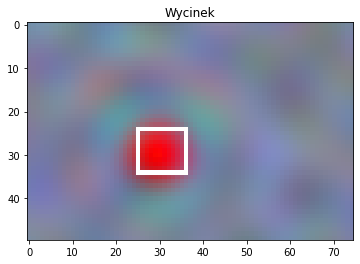

In [7]:
max_idx_x = np.argmax(pochodna_x)
min_idx_x = np.argmin(pochodna_x)

max_idx_y = np.argmax(pochodna_y)
min_idx_y = np.argmin(pochodna_y)

print("max_idx_x:", max_idx_x)
print("min_idx_x:", min_idx_x)
print("max_idx_y:", max_idx_y)
print("min_idx_y:", min_idx_y)

color = (255, 255, 255)  # Rectangle color in BGR format
thickness = 1  # Rectangle thickness

cv2.rectangle(image_part, (min_idx_x, min_idx_y), (max_idx_x, max_idx_y), color, thickness)


plt.imshow(image_part)
plt.title('Wycinek') 
plt.show()


Próba dla gray-scale




In [8]:
grey_image = cv2.cvtColor(imageObj, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_img,"Greys")

NameError: name 'gray_img' is not defined

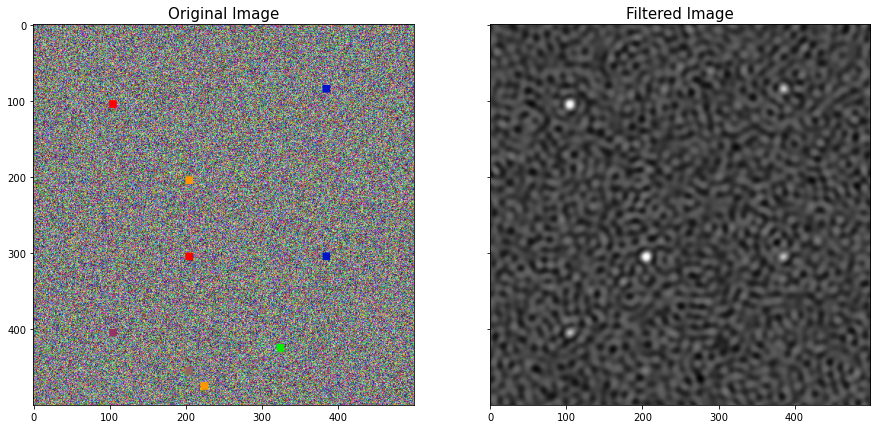

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(15,15), sharey = True)
rows, cols = imageObj[:,:,0].shape
filtered_grey = np.ones((500, 500), dtype='uint8')

    # Fourier transform
f_transform = np.fft.fft2(grey_image[:, :])
f_transform_shifted = np.fft.fftshift(f_transform)

    # Dimensions of the image
crow, ccol = rows // 2, cols // 2

    # Create a low-pass filter mask
mask = np.zeros((rows, cols), np.uint8)
r = 40
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0])**2 + (y - center[1])**2 <= r**2
mask[mask_area] = 1

    # Apply mask to the shifted FFT
f_transform_shifted_filtered = f_transform_shifted * mask

    # Inverse Fourier transform
f_transform_filtered = np.fft.ifftshift(f_transform_shifted_filtered)
image_filtered = np.fft.ifft2(f_transform_filtered).real  # Take the real part
image_filtered = np.abs(image_filtered)
    
    # Normalize to [0, 255]
image_filtered = (image_filtered - np.min(image_filtered)) / (np.max(image_filtered) - np.min(image_filtered)) * 255
filtered_grey[:, :] = image_filtered.astype('uint8')

    # Display the original and filtered images
ax[0].imshow(imageObj[:, :], cmap="Greys")
ax[0].set_title('Original Image', fontsize=15)

ax[1].imshow(filtered_grey[:, :], cmap="Greys")
ax[1].set_title('Filtered Image', fontsize=15)

plt.show()

In [18]:
cols, rows = imageObj[:,:,0].shape
base_image = filtered
solution_demo = imageObj.copy()
sub_img_size = 40
current_sub_img_size_x = sub_img_size
current_sub_img_size_y = sub_img_size
color = (255, 255, 255)
color_idx = 2
treshold = 240

for x in range(0,cols,sub_img_size):
    for y in range (0,rows,sub_img_size):
        hist_x = np.zeros(cols)
        hist_y = np.zeros(rows)
        
        if x + sub_img_size >= cols - 1:
            current_sub_img_size_x = cols - x 
            
        else:
            current_sub_img_size_x = sub_img_size
            
        
        if y + sub_img_size >= rows -1:
            current_sub_img_size_y = rows - y 
            
        else:
            current_sub_img_size_y = sub_img_size
        
        for row in range(current_sub_img_size_y):
            for col in range(current_sub_img_size_x):
                
                hist_x[col] += base_image[x + col][y + row][color_idx]
                hist_y[row] += base_image[x + col][y + row][color_idx]
                
        pochodna_y = np.gradient(hist_y,range(rows))
        pochodna_x = np.gradient(hist_x,range(cols)) 
        
        max_x = np.max(pochodna_x)
        min_x = np.min(pochodna_x)
        
        max_y = np.max(pochodna_y)
        min_y = np.min(pochodna_y)
        
        if max_x > treshold and max_y > treshold and min_x < -treshold and min_y < -treshold:
            max_idx_x = np.argmax(pochodna_x)
            min_idx_x = np.argmin(pochodna_x)

            max_idx_y = np.argmax(pochodna_y)
            min_idx_y = np.argmin(pochodna_y)

            cv2.rectangle(solution_demo, (min_idx_x + x, min_idx_y + y), (max_idx_x + x, max_idx_y + y), color, 4)


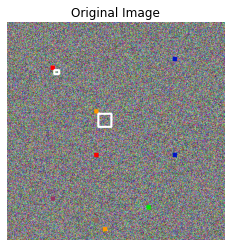

In [19]:
plt.axis("off") 
plt.title("Original Image") 
plt.imshow(solution_demo) 
plt.show() 

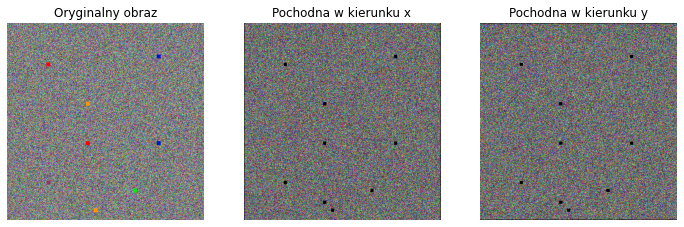

In [85]:
image = imageObj

derivative_x = cv2.Sobel(image, cv2.CV_16S, 1, 0, ksize=3)
derivative_y = cv2.Sobel(image, cv2.CV_16S, 0, 1, ksize=3)

derivative_x = np.uint8(np.absolute(derivative_x))
derivative_y = np.uint8(np.absolute(derivative_y))

# Wyświetl oryginalny obraz i pochodne
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Oryginalny obraz')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(derivative_x, cmap='gray')
plt.title('Pochodna w kierunku x')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(derivative_y, cmap='gray')
plt.title('Pochodna w kierunku y')
plt.axis('off')

plt.show()

In [ ]:
for i in range(y,y+current_sub_img_size_y):
    for j in range(x,x+current_sub_img_size_x):
        for k in range(channels):
            if derivative_x[i, j, k] > 128:
                derivative[i,j,k] = 255

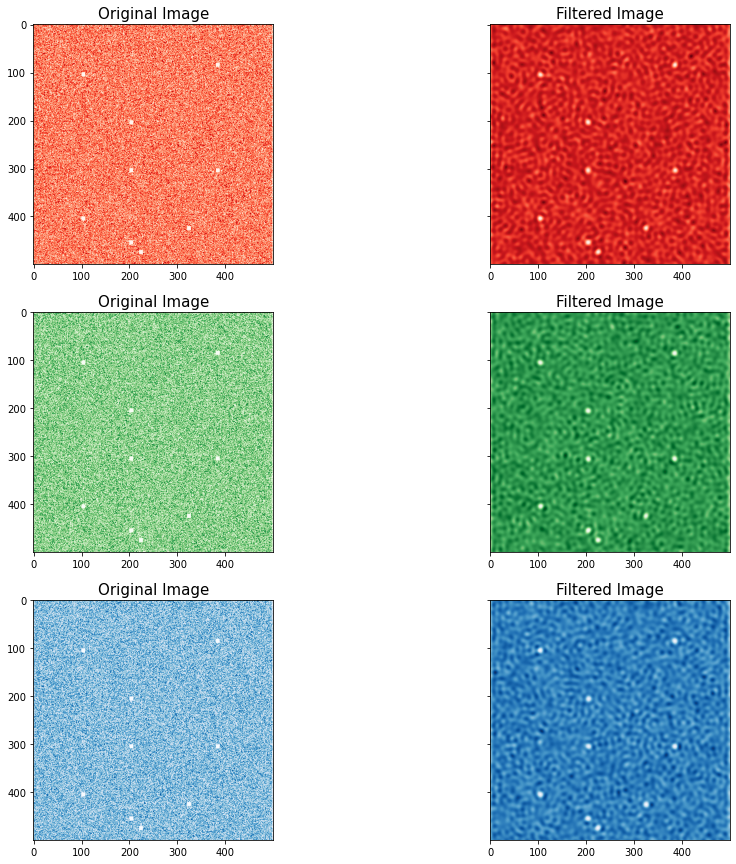

In [97]:
fig, ax = plt.subplots(3, 2, figsize=(15,15), sharey = True)
rows, cols = derivative_x[:,:,0].shape
filtered = np.ones((500, 500, 3), dtype='uint8')

base_img = derivative_x
for i in range(3):
    # Fourier transform
    f_transform = np.fft.fft2(base_img[:,:,i])
    f_transform_shifted = np.fft.fftshift(f_transform)

    # Dimensions of the image
    crow, ccol = rows // 2, cols // 2

    # Create a low-pass filter mask
    mask = np.zeros((rows, cols), np.uint8)
    r = 40
    center = [crow, ccol]
    x, y = np.ogrid[:rows, :cols]
    mask_area = (x - center[0])**2 + (y - center[1])**2 <= r**2
    mask[mask_area] = 1
    
    # Apply mask to the shifted FFT
    f_transform_shifted_filtered = f_transform_shifted * mask

    # Inverse Fourier transform
    f_transform_filtered = np.fft.ifftshift(f_transform_shifted_filtered)
    image_filtered = np.fft.ifft2(f_transform_filtered).real  # Take the real part
    image_filtered = np.abs(image_filtered)
    
    # Normalize to [0, 255]
    image_filtered = (image_filtered - np.min(image_filtered)) / (np.max(image_filtered) - np.min(image_filtered)) * 255
    filtered[:, :, i] = image_filtered.astype('uint8')

    # Display the original and filtered images
    ax[i][0].imshow(base_img[:, :, i], cmap=rgb_list[i])
    ax[i][0].set_title('Original Image', fontsize=15)

    ax[i][1].imshow(filtered[:, :, i], cmap=rgb_list[i])
    ax[i][1].set_title('Filtered Image', fontsize=15)

plt.show()

178.30317066666666


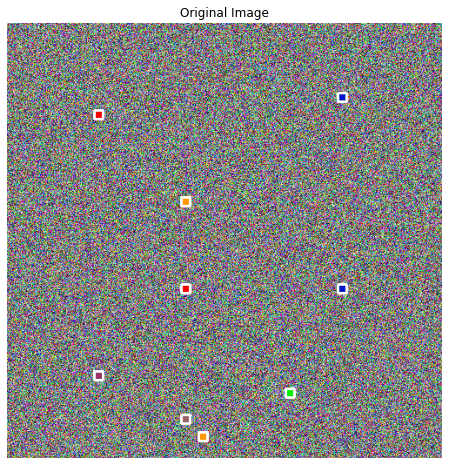

In [131]:
cols, rows = imageObj[:,:,0].shape
base_image = filtered
og_img = imageObj
solution_demo = imageObj.copy()
sub_img_size = 10
current_sub_img_size_x = sub_img_size
current_sub_img_size_y = sub_img_size
color = (255, 255, 255)
detected_pos = []
detected_col = []
treshold = 100
step = sub_img_size
height, width, channels = imageObj.shape

R = 0
G = 0
B = 0

# Calculate the total sum of pixel values for each channel
total_sum = [0, 0, 0]
for i in range(height):
    for j in range(width):
        for k in range(channels):
            total_sum[k] += base_image[i, j, k]

# Calculate the average pixel value for each channel
average_pixel_value = [sum / (height * width) for sum in total_sum]
average_pixel_value = sum(average_pixel_value)/3


for x in range(0,cols,step):
    for y in range (0,rows,step):
        total_sum = [0,0,0]
        
        if x + sub_img_size >= cols - 1:
            current_sub_img_size_x = cols - x 
            
        else:
            current_sub_img_size_x = sub_img_size
            
        
        if y + sub_img_size >= rows -1:
            current_sub_img_size_y = rows - y 
            
        else:
            current_sub_img_size_y = sub_img_size
        
        for i in range(y,y+current_sub_img_size_y):
            for j in range(x,x+current_sub_img_size_x):
                for k in range(channels):
                    total_sum[k] += base_image[i, j, k]
        
        local_avg = [sum / (current_sub_img_size_x * current_sub_img_size_y) for sum in total_sum]
        
        
        local_avg = sum(local_avg)/3
        
        
        if average_pixel_value - local_avg > treshold:
            cv2.rectangle(solution_demo, (x,y), (x+current_sub_img_size_x, y+current_sub_img_size_y), color, 2)
            detected_pos.append((x,y))
            R = og_img[x+math.floor(sub_img_size/2),y+math.floor(sub_img_size/2),0]
            G = og_img[x+math.floor(sub_img_size/2),y+math.floor(sub_img_size/2),1]
            B = og_img[x+math.floor(sub_img_size/2),y+math.floor(sub_img_size/2),2]
            detected_col.append((R,G,B))
            
plt.figure(num=None, figsize=(8, 8))
plt.axis("off") 
plt.title("Original Image") 
plt.imshow(solution_demo) 
plt.show() 
